Step 1: *Load the Groceries Dataset*


The Groceries dataset is available in the mlxtend library. First, ensure you have the required libraries installed:

In [1]:
pip install mlxtend pandas matplotlib seaborn

Step 2: *Load and Display the Dataset*


Let's load the dataset and show it in a DataFrame

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample Groceries transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'butter', 'yogurt'],
    ['milk', 'yogurt'],
    ['milk', 'bread', 'yogurt'],
    ['milk', 'bread', 'butter', 'yogurt'],
    ['milk', 'bread', 'butter']
]

# Transform the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the DataFrame
print("DataFrame:")
df.head()

DataFrame:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bread,butter,cheese,milk,yogurt
0,True,True,False,True,False
1,True,True,False,False,False
2,True,False,False,True,False
3,True,True,True,True,False
4,True,True,True,False,False


Step 3: *Preprocessing and Applying the Apriori Algorithm*

In [8]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
frequent_itemsets


Frequent Itemsets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.9,(bread)
1,0.7,(butter)
2,0.2,(cheese)
3,0.8,(milk)
4,0.4,(yogurt)
5,0.7,"(bread, butter)"
6,0.2,"(bread, cheese)"
7,0.7,"(bread, milk)"
8,0.3,"(bread, yogurt)"
9,0.2,"(cheese, butter)"


Step 4: *Deriving Association Rules*

In [9]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the association rules
print("Association Rules:")
rules


Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(butter),0.9,0.7,0.7,0.777778,1.111111,0.07,1.35,1.000000
1,(butter),(bread),0.7,0.9,0.7,1.000000,1.111111,0.07,inf,0.333333
2,(cheese),(bread),0.2,0.9,0.2,1.000000,1.111111,0.02,inf,0.125000
3,(bread),(milk),0.9,0.8,0.7,0.777778,0.972222,-0.02,0.90,-0.222222
4,(milk),(bread),0.8,0.9,0.7,0.875000,0.972222,-0.02,0.80,-0.125000
5,(yogurt),(bread),0.4,0.9,0.3,0.750000,0.833333,-0.06,0.40,-0.250000
6,(cheese),(butter),0.2,0.7,0.2,1.000000,1.428571,0.06,inf,0.375000
7,(milk),(butter),0.8,0.7,0.5,0.625000,0.892857,-0.06,0.80,-0.375000
8,(butter),(milk),0.7,0.8,0.5,0.714286,0.892857,-0.06,0.70,-0.285714
9,(yogurt),(milk),0.4,0.8,0.4,1.000000,1.250000,0.08,inf,0.333333


Step 5: *Data Visualization*

We can use matplotlib and seaborn to create graphical representations of the frequent itemsets and the association rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


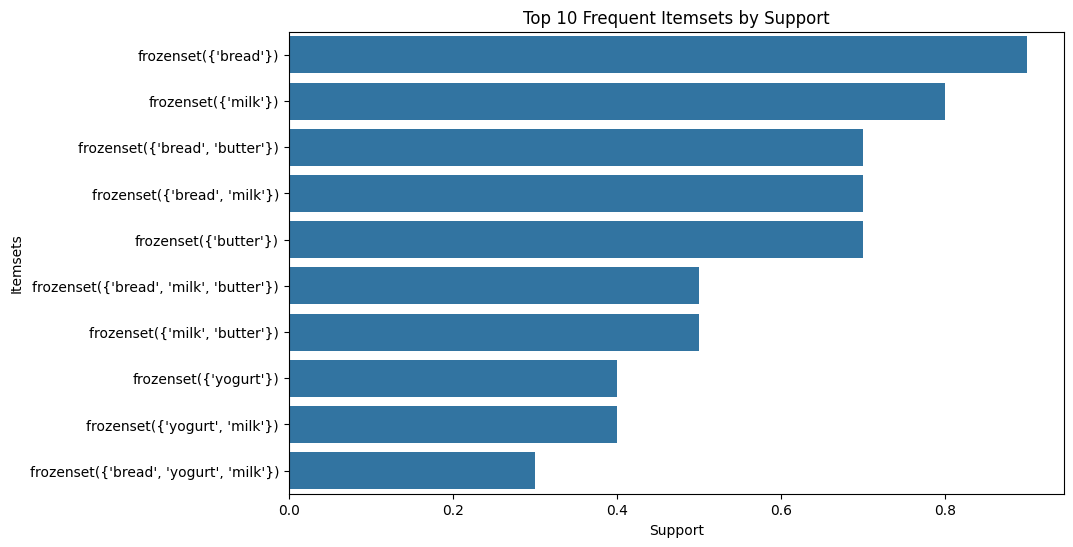

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the support of frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x="support", y="itemsets", data=frequent_itemsets.sort_values(by="support", ascending=False).head(10))
plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


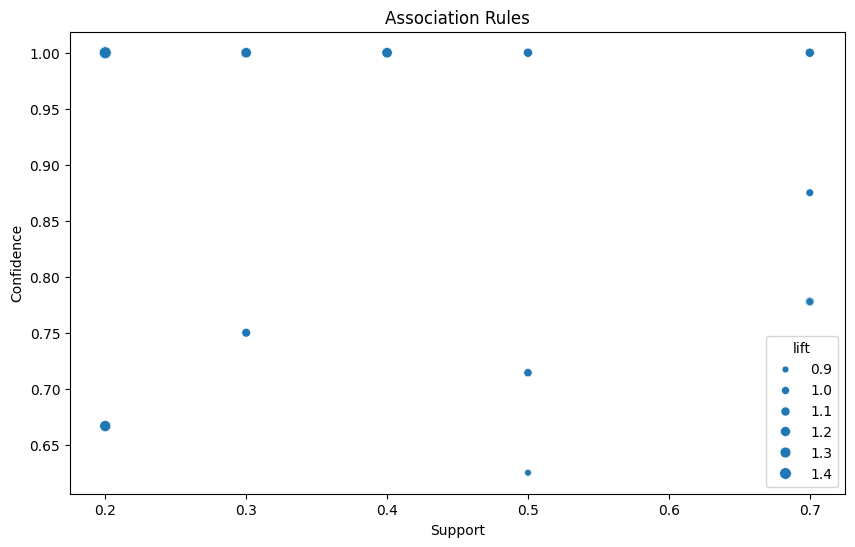

In [11]:
# Plot the association rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()